In [31]:
from salad.serialize import read
from salad.catalog import DetectionCatalog, MultiEpochDetectionCatalog
import numpy as np
import matplotlib.pyplot as plt

In [4]:
catalog = read("../search/tmp/DEEP/20190403/A0c/detector_1/snr_5/catalog.pkl")

In [8]:
X_orig = catalog.X()
X_new = X_orig.copy()
exposures = catalog.exposure
unique_exposures = np.unique(exposures)
shuffled = np.random.permutation(unique_exposures)

In [10]:
for orig, new in zip(unique_exposures, shuffled):
    m_orig = exposures == orig
    m_new = exposures == new
    time_new = X_orig[m_new, 2][0]
    X_new[m_orig, 2] = time_new # replace old time with new

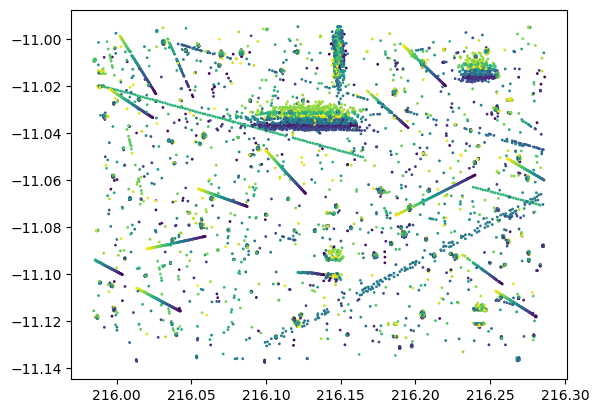

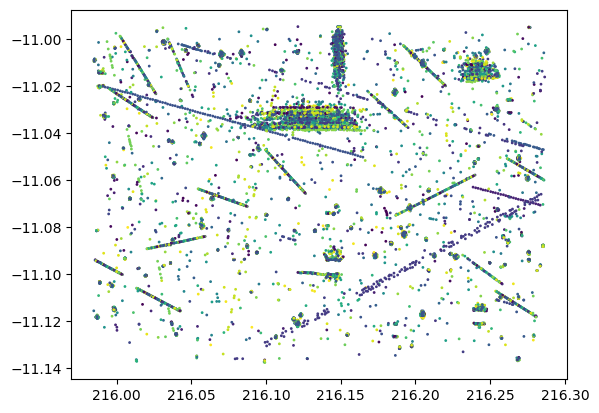

In [16]:
plt.scatter(X_orig[:, 0], X_orig[:, 1], c=X_orig[:, 2], s=1)
plt.show()
plt.scatter(X_new[:, 0], X_new[:, 1], c=X_new[:, 2], s=1)
plt.show()

In [33]:
times = {}
for c in catalog.single_epoch_catalogs:
    times[c.exposure] = c._time
    
new_catalogs = []

for orig, new in zip(unique_exposures, shuffled):
    c = list(filter(lambda c : c.exposure == orig, catalog.single_epoch_catalogs))[0]
    new_catalogs.append(DetectionCatalog(c.catalog, times[new], new))

new_catalog = MultiEpochDetectionCatalog(new_catalogs)

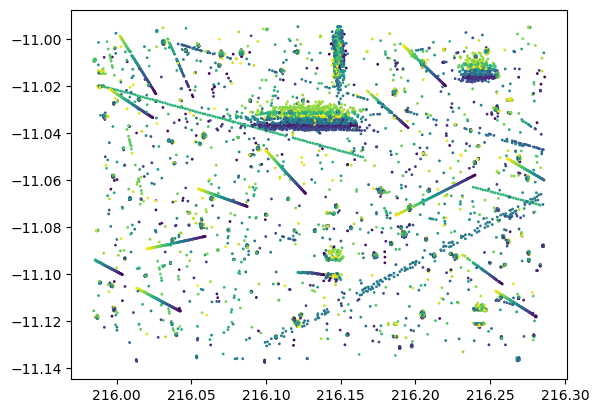

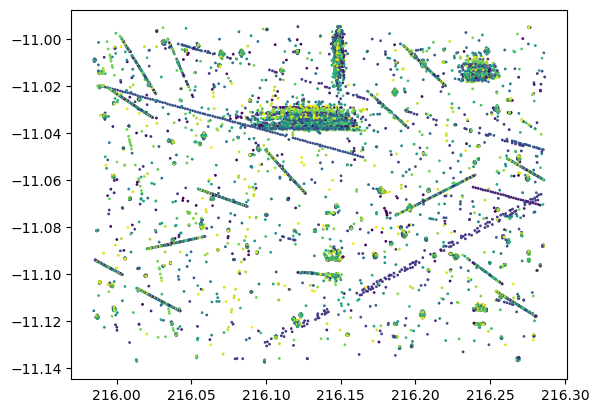

In [34]:
X_orig = catalog.X()
X_new = new_catalog.X()

plt.scatter(X_orig[:, 0], X_orig[:, 1], c=X_orig[:, 2], s=1)
plt.show()
plt.scatter(X_new[:, 0], X_new[:, 1], c=X_new[:, 2], s=1)
plt.show()

In [35]:
new_catalog.write("../search/tmp/DEEP/20190403/A0c/detector_1/snr_5/catalog_shuffle.pkl")

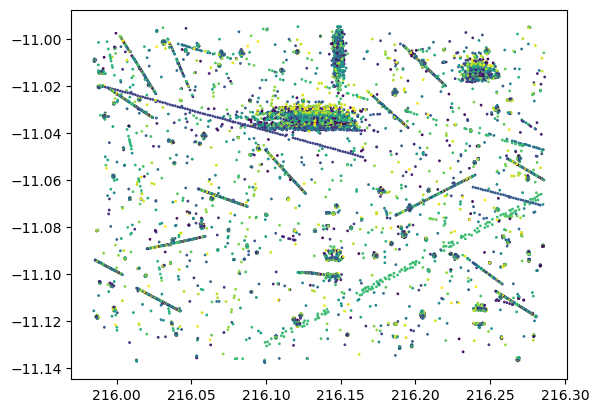

In [41]:
shuffled = read("../search/tmp/DEEP/20190403/A0c/detector_1/snr_5/catalog_shuffled.pkl")

X = shuffled.X()
plt.scatter(X[:, 0], X[:, 1], c=X[:, 2], s=1)
plt.show()

In [42]:
clusters = read("../search/tmp/DEEP/20190403/A0c/detector_1/snr_5/clusters_shuffled.pkl")

In [44]:
from salad.regression import regression

def plot_cluster(cluster):
    p = cluster.points
    x, y = p[:, 2][:, None], p[:, :2]
#     regression_result = regression(x, y)
    plt.scatter(y[:, 0], y[:, 1], c=x[:, 0], s=1)
    
def plot_result(result, x):
    _x = np.linspace(x.min(), x.max(), 100)[:, None]
    _y = _x @ result.beta + regression_result.alpha
    plt.plot(_y[:, 0], _y[:, 1])
    
def filter_velocity(cluster, vmin=0.1, vmax=0.5):
    p = cluster.points
    x, y = p[:, 2][:, None], p[:, :2]
    regression_result = regression(x, y)
    v = (regression_result.beta**2).sum()**0.5
    return (v > vmin) and (v <= vmax)

def filter_n(cluster, n=15):
    return len(cluster.points) >= n

In [52]:
filter(filter_velocity, filter(filter_n, clusters))

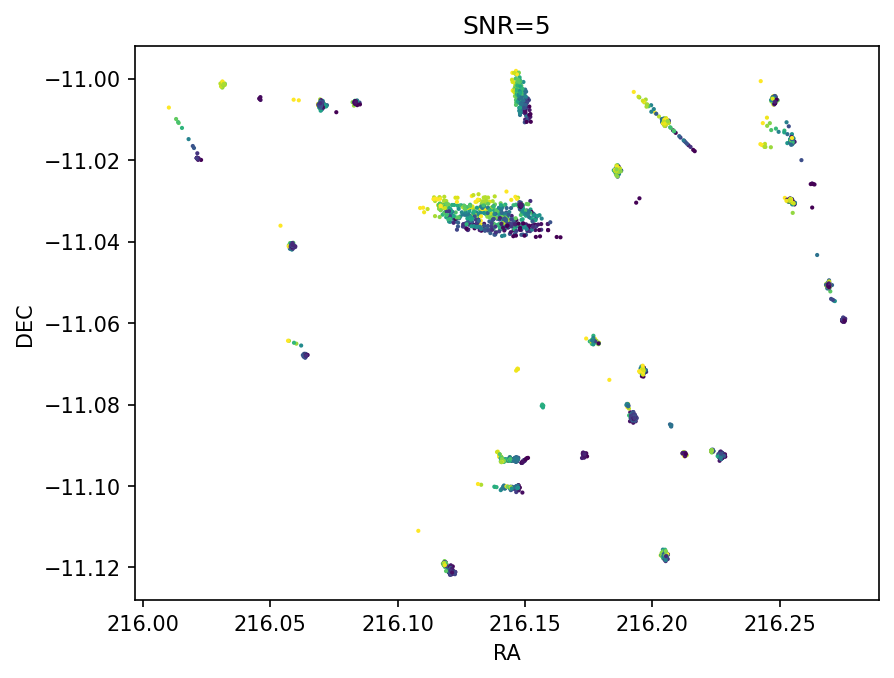

In [48]:

clusters = read("../search/tmp/DEEP/20190403/A0c/detector_1/snr_5/clusters_shuffled.pkl")
# clusters = filter(filter_velocity, filter(filter_n, clusters))
fig = plt.figure(facecolor='white', dpi=150)
for cluster in clusters:
    plot_cluster(cluster)
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("SNR=5")
plt.show()

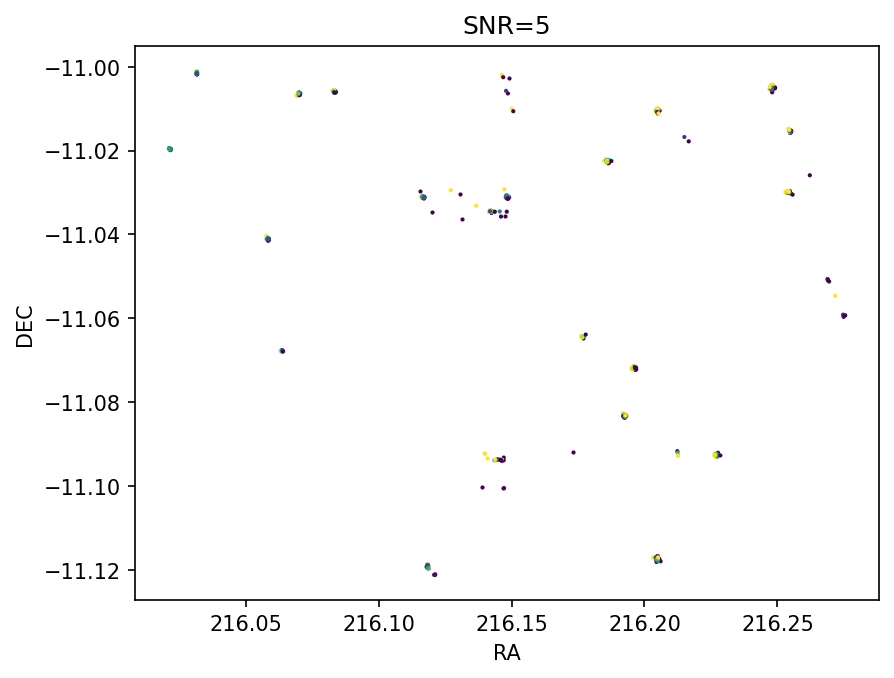

In [49]:
clusters = read("../search/tmp/DEEP/20190403/A0c/detector_1/snr_5/gathered_1_shuffled.pkl")
# clusters = filter(filter_velocity, filter(filter_n, clusters))
fig = plt.figure(facecolor='white', dpi=150)
for cluster in clusters:
    plot_cluster(cluster)
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("SNR=5")
plt.show()

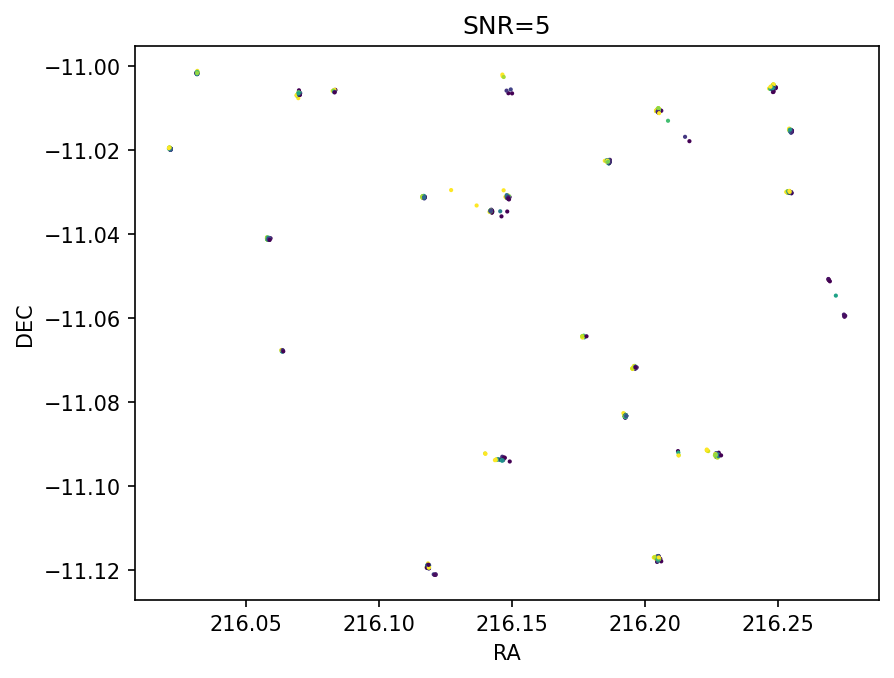

In [50]:
clusters = read("../search/tmp/DEEP/20190403/A0c/detector_1/snr_5/gathered_2_shuffled.pkl")
# clusters = filter(filter_velocity, filter(filter_n, clusters))
fig = plt.figure(facecolor='white', dpi=150)
for cluster in clusters:
    plot_cluster(cluster)
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("SNR=5")
plt.show()